## Develop a program to implement Principal Component Analysis (PCA) for reducing the dimensionality of the Iris dataset from 4 features to 2.

In [14]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Loading the Irirs Dataset

In [11]:
data = datasets.load_iris()

In [12]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [20]:
# Creating Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Set target columns in the data frame
df['target'] = data.target 


In [21]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


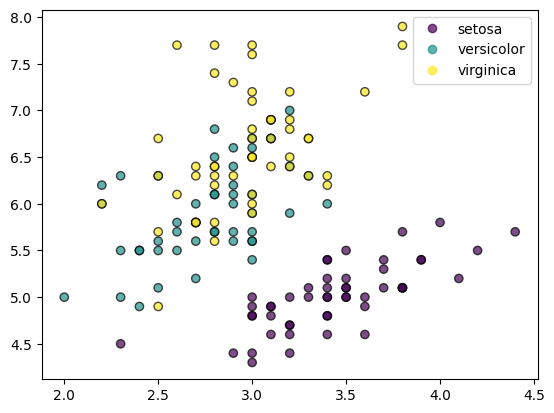

In [43]:
plt.scatter(df['sepal width (cm)'], df['sepal length (cm)'], c=df['target'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=list(data.target_names))

In [29]:
# Standardize the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])  

In [31]:
# Appling PCA to reduce Dimentions from 4D to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Creating a new dataframe for the principle components
df2 = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

In [34]:
df2

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [35]:
# Explained variance ratio (how much variance is captured by each component)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762])

### Visualizing the PC1 and PC2

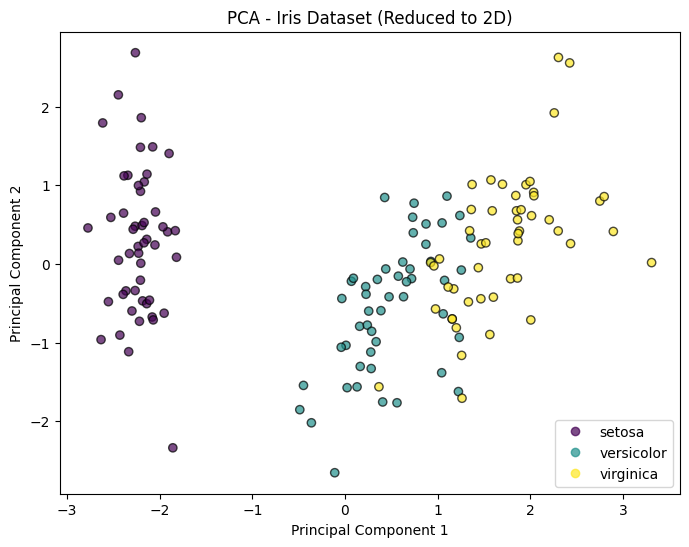

In [38]:
# Plot PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df2['PC1'], df2['PC2'], c=df['target'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Iris Dataset (Reduced to 2D)")
plt.legend(handles=scatter.legend_elements()[0], labels=list(data.target_names))
plt.show()